In [1]:
import numpy as np
import pandas as pd
from jvdp_workflow.data import get_fremont_data
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline
from sklearn.mixture import GaussianMixture

## Collect Data

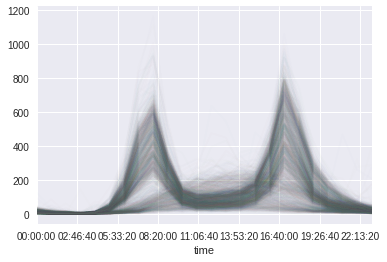

In [2]:
data = get_fremont_data()
pivoted = data.pivot_table("Total", index=data.index.time, columns=data.index.date)
pivoted.plot(legend=False, alpha=0.01)

## PCA

In [3]:
X = pivoted.fillna(0).T.values
X.shape

(1885, 24)

In [4]:
X2 = PCA(2, svd_solver='full').fit_transform(X)
X2.shape

(1885, 2)

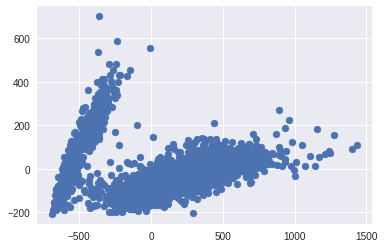

In [5]:
plt.scatter(X2[:, 0], X2[:, 1])

## Unsupervised clustering

In [6]:
gmm = GaussianMixture(2)
gmm.fit(X)
labels = gmm.predict(X)
labels

array([1, 1, 1, ..., 1, 1, 1])

In [7]:
labels.sum()/len(labels)
# 5/7

0.69071618037135274

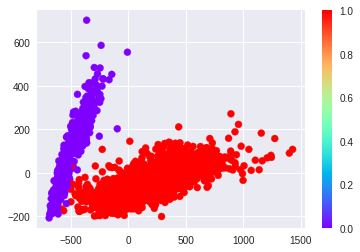

In [8]:
plt.scatter(X2[:, 0], X2[:, 1], c=labels, cmap = "rainbow")
plt.colorbar()

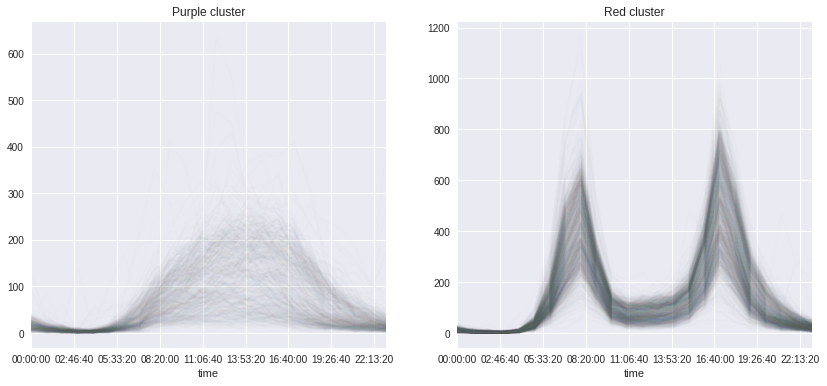

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

pivoted.T[labels == 0].T.plot(legend=False, alpha = 0.01, ax=ax[0])
pivoted.T[labels == 1].T.plot(legend=False, alpha = 0.01, ax=ax[1])

ax[0].set_title("Purple cluster")
ax[1].set_title("Red cluster")

## Comparing with day of week

In [10]:
dayofweek = pd.DatetimeIndex(pivoted.columns).dayofweek
dayofweek

Int64Index([2, 3, 4, 5, 6, 0, 1, 2, 3, 4,
            ...
            1, 2, 3, 4, 5, 6, 0, 1, 2, 3],
           dtype='int64', length=1885)

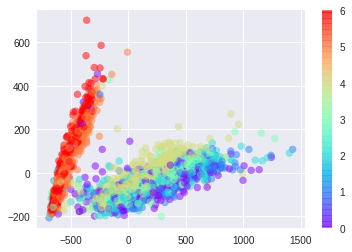

In [11]:
plt.scatter(X2[:, 0], X2[:, 1], c=dayofweek, cmap = "rainbow", alpha = 0.5)
plt.colorbar()

## Analyzing outliers
The following days are week days with an holiday-like pattern

In [12]:
dates = pd.DatetimeIndex(pivoted.columns)
dates[(labels == 1) & (dayofweek < 5)]

DatetimeIndex(['2012-10-03', '2012-10-04', '2012-10-05', '2012-10-08',
               '2012-10-09', '2012-10-10', '2012-10-11', '2012-10-12',
               '2012-10-15', '2012-10-16',
               ...
               '2017-11-15', '2017-11-16', '2017-11-17', '2017-11-20',
               '2017-11-21', '2017-11-22', '2017-11-27', '2017-11-28',
               '2017-11-29', '2017-11-30'],
              dtype='datetime64[ns]', length=1301, freq=None)

What's up with Feb 06 2017 ? https://www.youtube.com/watch?v=vGBrXsny1lQ